In [ ]:
import pandas as pd 
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras import losses
from keras import metrics

In [ ]:
wine = pd.read_csv('/content/winequality-red.csv')

In [ ]:
inputs = wine.iloc[:,0:11]      # 입력값 0~10행
target = wine.iloc[:,11:12]     # 출력값 11행
test_size=0.2       # 테스트 할 데이터의 비율
ntrain = int(inputs.shape[0]*(1-test_size))   # 학습시킬 데이터의 개수
x_train = inputs.iloc[:ntrain,:]      
x_test = inputs.iloc[ntrain:,:]
y_train = target.iloc[:ntrain,:]
y_test = target.iloc[ntrain:,:]
y_train = pd.get_dummies(y_train['quality'])    # target값 one-hot-encoding 

In [ ]:
inputs

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [ ]:
tm = inputs['total sulfur dioxide'].mean()
tstd = inputs['total sulfur dioxide'].std()
fm = inputs['free sulfur dioxide'].mean()
fstd = inputs['free sulfur dioxide'].std()
inputs['total sulfur dioxide'] = (inputs['total sulfur dioxide'] - tm)/tstd   # 'total sulfur dioxide' z-score 변환
inputs['free sulfur dioxide'] = (inputs['free sulfur dioxide'] - fm)/fstd     # 'free sulfur dioxide' z-score 변환

In [ ]:
model = Sequential()      # Sequential모델 설정
model.add(Dense(50, input_dim=x_train.shape[1], activation="linear"))   # 노드의 개수가 50개, 활성화 함수는 linear
model.add(Dense(30, activation="tanh"))     # 노드 30개, 활성화 함수 tanh
model.add(Dense(20, activation="sigmoid"))      # 노드 20개, 활성화 함수 sigmoid
model.add(Dense(10, activation="sigmoid"))      # 노드 10개, 활성화 함수 sigmoid
model.add(Dense(6, activation="softmax"))       # 노드 6개(출력값의 개수), 활성화 함수 softmax
model.compile(optimizer=tf.optimizers.SGD(learning_rate=0.025),   # 모델 컴파일(정규화 : SGD사용(learning_rate = 0.025) )
              loss=losses.categorical_crossentropy,     # 손실함수 = categorical_crossentropy 함수 사용
              metrics=['accuracy'])       # 평가지표 = 정확도
history = model.fit(x_train, y_train, epochs=2000,batch_size=10)   # 모델 훈련, 2000번 반복, 한번에 데이터 10개씩 사용

Epoch 1/2000
128/128 [==============================] - 1s 1ms/step - loss: 1.3772 - accuracy: 0.3933
Epoch 2/2000
128/128 [==============================] - 0s 2ms/step - loss: 1.2230 - accuracy: 0.4011
Epoch 3/2000
128/128 [==============================] - 0s 1ms/step - loss: 1.2061 - accuracy: 0.4159
Epoch 4/2000
128/128 [==============================] - 0s 2ms/step - loss: 1.1997 - accuracy: 0.4089
Epoch 5/2000
128/128 [==============================] - 0s 1ms/step - loss: 1.1944 - accuracy: 0.4292
Epoch 6/2000
128/128 [==============================] - 0s 1ms/step - loss: 1.1936 - accuracy: 0.4191
Epoch 7/2000
128/128 [==============================] - 0s 1ms/step - loss: 1.1924 - accuracy: 0.4120
Epoch 8/2000
128/128 [==============================] - 0s 1ms/step - loss: 1.1903 - accuracy: 0.4394
Epoch 9/2000
128/128 [==============================] - 0s 2ms/step - loss: 1.1909 - accuracy: 0.4269
Epoch 10/2000
128/128 [==============================] - 0s 1ms/step - loss: 1.187

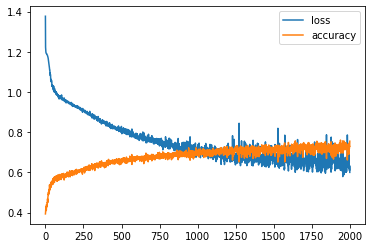

In [ ]:
df = pd.DataFrame(history.history)
df.plot()

In [ ]:
pred = model.predict(x_test.values)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,np.argmax(pred,axis=1)+3)   # 학습시킨 모델로 x_test를 넣어봤을 때 확률? 
# +3하는 이유 = 3~8까지의 quality값을 one hot encoding 했다가 다시 argmax로 바꾸면서 0~5까지의 값으로 바뀌기 때문

0.515625

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,np.argmax(pred,axis=1)+3)   # 학습시킨 모델로 x_test를 넣어봤을 때 확률?을 시각화(행렬)
# +3하는 이유 = ""

array([[ 0,  0,  5,  0,  0,  0],
       [ 0,  3,  6,  2,  0,  0],
       [ 0,  3, 75, 57,  8,  0],
       [ 0,  6, 27, 79, 24,  0],
       [ 0,  0,  0, 14,  8,  0],
       [ 0,  0,  0,  2,  1,  0]])